# TMDB Analysis
##### By Gavin Oliver

### 0. Importing (code)

In [1]:
import numpy as np # all the packages used in this file
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [2]:
tmdb = pd.read_csv("TMDB_movies.csv") # movies file

### 1. Initial Exploration (mostly code)

In this section I am just getting a feel for the data set by performing some routine checks.

#### 1.1 Basic Checks (code only)

In [3]:
tmdb.shape 

(4803, 20)

In [4]:
pd.set_option('display.max_columns', 0)

In [5]:
tmdb.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [6]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

#### 1.2 Checking the Nulls (1 movie dropped)

In [7]:
tmdb[(tmdb['overview'].isnull()==True)|(tmdb['release_date'].isnull()==True)|(tmdb['runtime'].isnull()==True)] 
# this checks the values that have a few (not many) nulls highlighted in the .info section above 

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",NaN,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,NaN,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,292539,[],de,Food Chains,NaN,0.795698,[],[],2014-04-26,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Food Chains,7.4,8
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.000000,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0


'America is still the place' has a descriptive overview but also a lot of null or zero values and so I decided to drop it from the data set.

In [8]:
tmdb['release_date'].dropna(inplace=True) #this drops 'America is still the place'

### 2. Preliminary Analysis (Best Performers and Correlation)

#### 2.0 Best and Worst Performers (Highest revenue: Avatar)

In [9]:
tmdb[tmdb.revenue==tmdb.revenue.max()][['title', 'revenue']]

,title,revenue
0,Avatar,2787965087


In [10]:
top_10_rev = tmdb[['title', 'revenue']].sort_values(by='revenue', ascending= False).head(10) # top ten movies by revenue

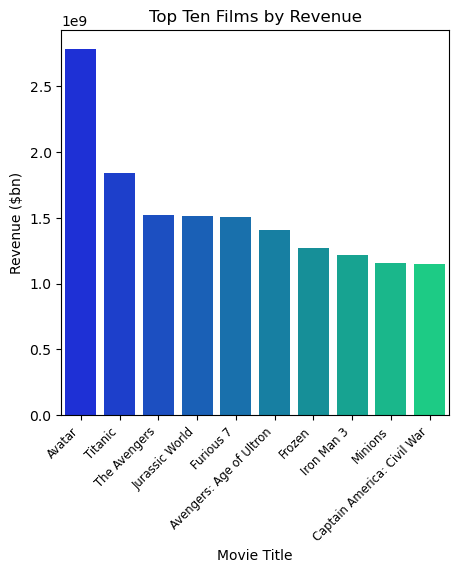

In [11]:
plt.figure(figsize = (5,5))
sns.barplot(data=top_10_rev, 
            x='title', 
            y='revenue',
            palette = 'winter'
           )

plt.xticks( ticks = range(10), 
            rotation= 45 , 
            horizontalalignment = 'right', 
            fontsize =  'small' 
          )
plt.xlabel('Movie Title')
plt.ylabel('Revenue ($bn)')
plt.title('Top Ten Films by Revenue') 

plt.show()

Here, excluding Titanic, we see that Avatar's revenue was nearly double that of the rest of the top ten films. Could this be due to something else or was it just luck? 

In [12]:
tmdb[tmdb.revenue==tmdb.revenue.min()][['title', 'revenue']].count() #films making no revenue

title      1427
revenue    1427
dtype: int64

On the other end of the spectrum, we see that there are 1427 movies that make no revenue. Too many to consider individually, but it motivates the investigation towards any potential factors that influence whether a movie will be a success, based on its revenue.

#### 2.1 Numeric Correlation (Budget and Revenue look correlated)

I'm interested in how the numeric quantities correlate. Whilst vote_average and vote_count may show an association with other variables, I believe that they are dependant variables rather than influencers on the revenue or runtime, for example. Id will have no meaning for this analysis.

In [13]:
numeric_columns = ['budget', 'popularity', 'revenue', 'runtime'] #These are the numeric columns of interest.

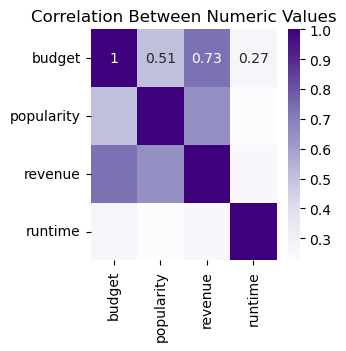

In [14]:
plt.figure(figsize = (3,3))
sns.heatmap(tmdb[numeric_columns].corr(),
            annot = True, 
            cmap="Purples")
plt.title('Correlation Between Numeric Values')
plt.show()

There seems to be a fairly strong correlation between budget and revenue so I will look into this further. 

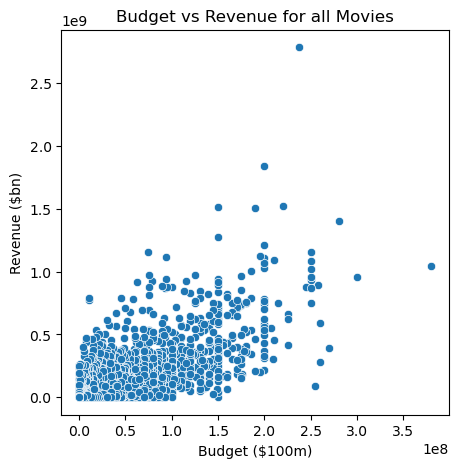

In [15]:
plt.figure(figsize = (5,5))
sns.scatterplot(data=tmdb, 
                x='budget', 
                y= 'revenue')
plt.title('Budget vs Revenue for all Movies')
plt.xlabel('Budget ($100m)')
plt.ylabel('Revenue ($bn)')
plt.show()

As the correlation matrix suggested, we see a positive trend that shows that, generally, as budget increases, so too does revenue. It's perhaps not as close as I'd like to see so perhaps there's something else at play here. Perhaps we'll see more patterns if the data is filtered?

### 3. Filtering the Data (Popularity, Revenue and Zero Budget)

#### 3.0 Top 50 by Revenue and Popularity (Correlations Get Worse)

Might we see different correlations amongst the most popular or the highest revenue movies?

In [16]:
top50_rev = tmdb.sort_values(by= 'revenue', ascending=False).head(50) #top 50 films by revenue

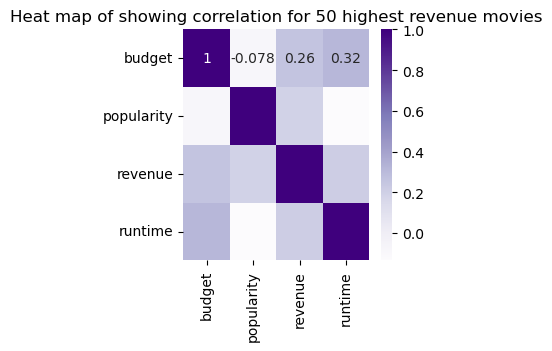

In [17]:
plt.figure(figsize = (3,3))
sns.heatmap(top50_rev[numeric_columns].corr(),
            annot = True, 
            cmap="Purples")
plt.title('Heat map of showing correlation for 50 highest revenue movies')
plt.show()

In [18]:
top50_pop = tmdb.sort_values(by= 'popularity', ascending=False).head(50) #top 50 films by popularity

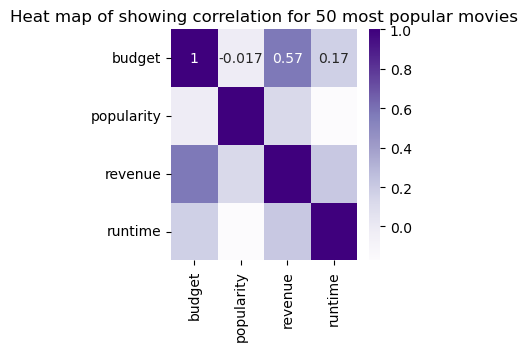

In [19]:
plt.figure(figsize = (3,3))
sns.heatmap(top50_pop[numeric_columns].corr(),
            annot = True, 
            cmap="Purples")
plt.title('Heat map of showing correlation for 50 most popular movies')
plt.show()

Here we see that the most correlated pairing is budget and revenue, again. However, it is a much reduced showing compared to that of the whole data set. This could be because the top 50 popular movies are in some sense anomalous already and so show little pattern. I was surprised to see that there was no pattern with runtime, for example. So what part does budget play in a movie at all? Is it possible to have a successful film with a reduced budget or none at all?

#### 3.1 Top 10 by Budget

In [20]:
top_10_bud = tmdb[['title', 'budget']].sort_values(by='budget', ascending= False).head(10)

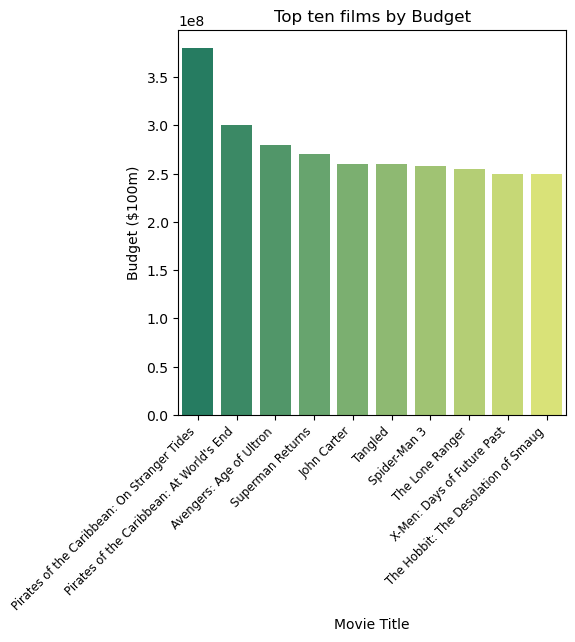

In [21]:
plt.figure(figsize = (5,5))
sns.barplot(data=top_10_bud, 
            x='title', 
            y='budget',
            palette = 'summer')

plt.xticks( ticks = range(10), 
            rotation= 45 , 
            horizontalalignment = 'right', 
            fontsize =  'small' 
          )

plt.title('Top ten films by Budget')
plt.xlabel('Movie Title')
plt.ylabel('Budget ($100m)')

plt.show()

Returning to Avatar, we see here that it was not in the top ten budgets and we clearly have a situation where a smaller budget has produced an above average result. Could it be possible that we have a film that is successful with zero budget?

#### 3.2 Zero Budget Movies (some anomalies, perhaps?)

Considering the scatter graph from section 2.2, we notice a number of movies doing well with zero (or close to zero) budget. Perhaps unsurpisingly, anything earning significantly more than zero is considered an outlier but there certainly many films making a good revenue

In [22]:
bud0_films= tmdb[tmdb['budget']==0] #finds the films with zero budget

In [23]:
bud0_films.sort_values(by= 'revenue', ascending=False)[['title','budget', 'revenue']].head(10) 
# finds the highest revenue amongst the zero budget films

,title,budget,revenue
691,Wild Hogs,0,253625427
2669,Crocodile Dundee II,0,239606210
359,Alvin and the Chipmunks: The Road Chip,0,233755553
1821,Scooby-Doo 2: Monsters Unleashed,0,181466833
766,Garfield: A Tail of Two Kitties,0,141702264
1527,Mr. Holland's Opus,0,106269971
321,The Campaign,0,104907746
2863,House of Flying Daggers,0,92863945
2393,Madea Goes to Jail,0,90508336
2862,About Time,0,87100449


Plotting Avatar alongside Wild Hogs puts these values into perspective:

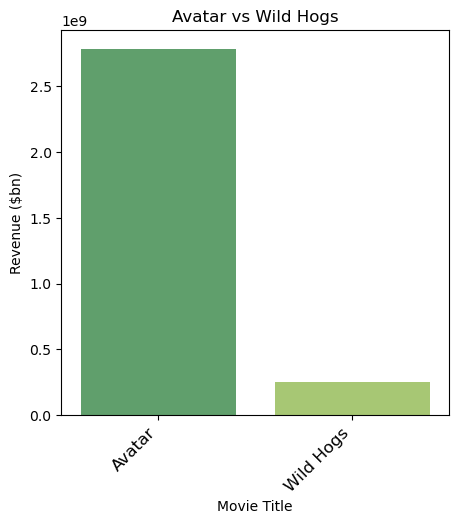

In [24]:
plt.figure(figsize = (5,5))
sns.barplot(data=tmdb[(tmdb['title']=='Avatar')|(tmdb['title']=='Wild Hogs')], # Just plotting the values for Avatar and Wild Hogs
            x='title', 
            y='revenue',
            palette = 'summer'
            )

plt.xticks( ticks = range(2), # Distance between points
            rotation= 45 , # rotating labels
            horizontalalignment = 'right', # aligning them with the bars
            fontweight = 'light',
            fontsize =  'large' # setting the fonts
            )

plt.title('Avatar vs Wild Hogs')
plt.xlabel('Movie Title')
plt.ylabel('Revenue ($bn)')

plt.show()

However we see just from the top ten that we have a number of big name movies with a zero budget. A check of Wild Hogs on the internet suggests a budget of approximately $60m [https://en.wikipedia.org/wiki/Wild_Hogs]. This leads to the question: How many values are incorrect in the budget column? How many zeros are just a flag for a null value? 

Filtering in a different way may yeild more results. I will investigate the effect that genre has on patterns in the data.

### 4. Analysis by Genre (movies catagories with 3 to 6 genres do well)

#### 4.0 Extracting Genres from the Genre Strings in the Data (mostly code, max number of genres is 7)

In [25]:
def info_ext(x): # This code was provided by Alex Caian. It separates the string provided into a list of values.
    x = ast.literal_eval(x)
    separated_names=[]
    for item in x:
        separated_names.append(item['name'])
    return separated_names

In [26]:
tmdb['genre_names']=tmdb['genres'].apply(info_ext) # This code was provided by Alex Caian. This applies the above code.

In [27]:
def length(x): #applying the predefined len() seemed to find the length of all strings in the list rather than the desired lenght of the list- this seemed to work
        return len(x)

In [28]:
tmdb['genre_num']=tmdb['genre_names'].apply(length) #this works out how many genres are attached to each movie

In [29]:
tmdb.genre_num.max() # finding the maximum number of genres

7

In [30]:
genre_list=[] #this code generates a list of all possible genres from all films
for list in tmdb.genre_names:
    for x in list:
        if x in genre_list:
            genre_list=genre_list
        else:
            genre_list.append(x)

In [31]:
for genre in genre_list: # This code was provided by Alex Caian and provides a true/false entry in a new column with a particular genre.
    tmdb[genre] = tmdb['genre_names'].apply(lambda x: genre in x)

#### 4.1 Correlation matrices (no clear additional findings)

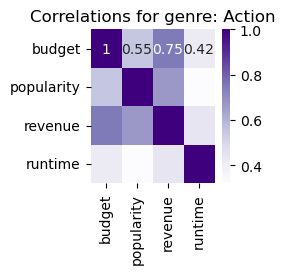

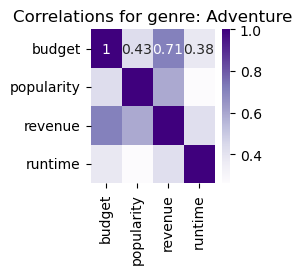

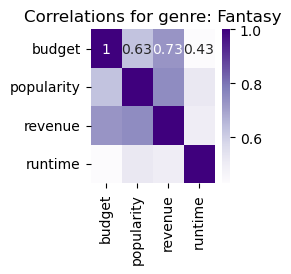

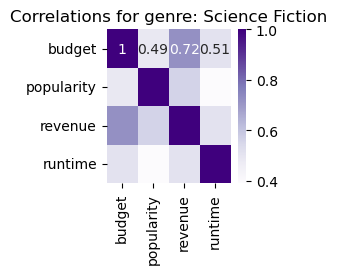

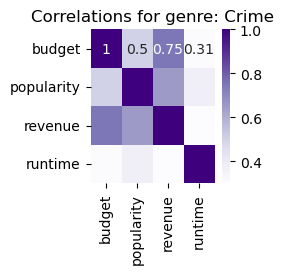

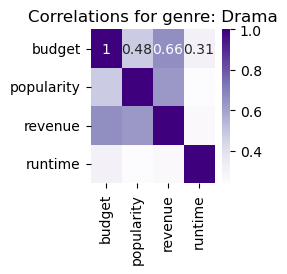

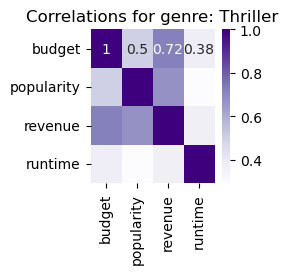

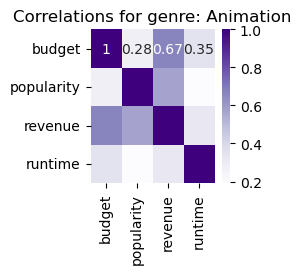

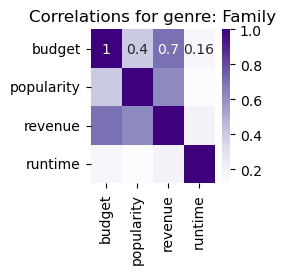

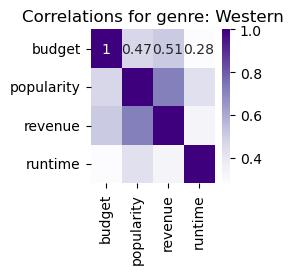

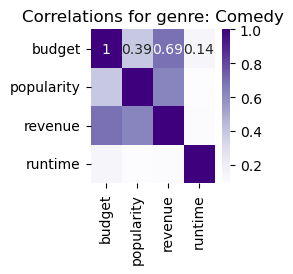

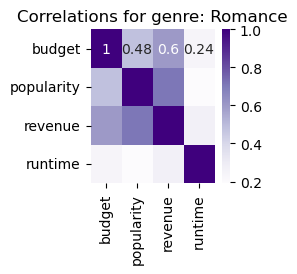

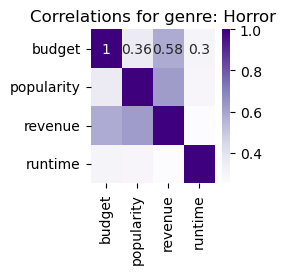

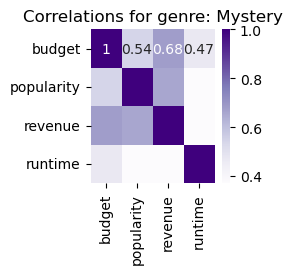

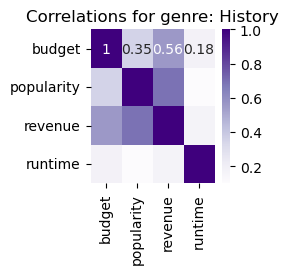

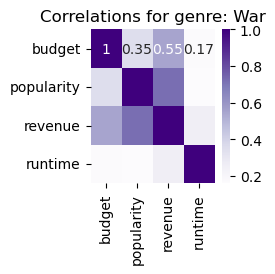

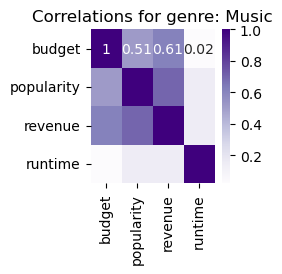

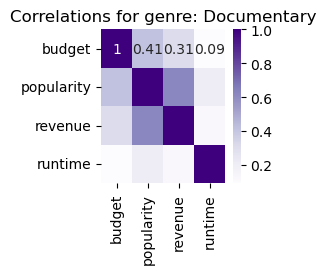

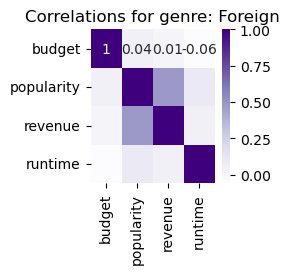

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


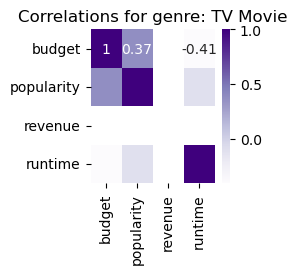

In [32]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
for genre in genre_list:
    plt.figure(figsize = (2,2))
    sns.heatmap(tmdb[tmdb[genre]==True][numeric_columns].corr().round(2),
                annot = True, 
                cmap="Purples")
    plt.title("Correlations for genre: " + genre )
    plt.show()

#### 4.2 Number of genres vs popularity and revenue (movies catagories with 3 to 6 genres do well)

In [33]:
genpop =tmdb.groupby('genre_num')[['popularity']].mean().reset_index() #grouping the films by how many genre's they have and looking at the mean of the popularities

<Axes: xlabel='genre_num', ylabel='popularity'>

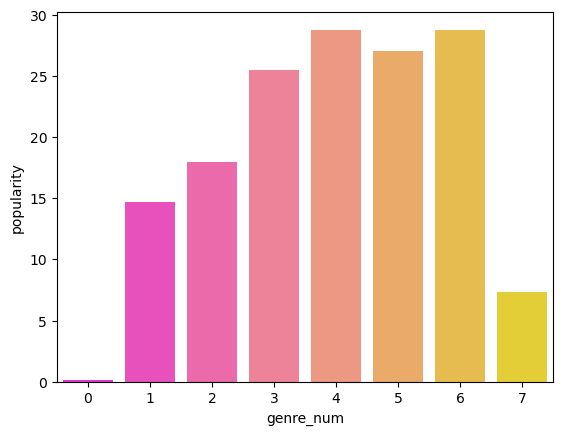

In [34]:
sns.barplot(data=genpop, x='genre_num', y='popularity',palette = 'spring')

In [35]:
genrev =tmdb.groupby('genre_num')[['revenue']].mean().reset_index() #grouping the films by how many genre's they have and looking at the mean of the revenues

<Axes: xlabel='genre_num', ylabel='revenue'>

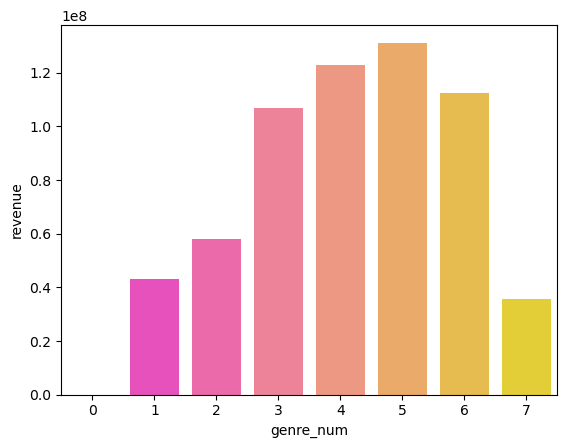

In [36]:
sns.barplot(data=genrev, x='genre_num', y='revenue',palette = 'spring')